In [1]:
# Importing  necssary libraries 

import pandas as pd
from pylab import *
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pylab
import sys
import matplotlib.dates as mdates
from glob import glob

### Analysis for Weather station WNEM4 ###

In [2]:
# Reading data of station WNEM4 (from 2007 till 2019) and creating data frames
# the output is a list of data frames
# Using glob() method to read multiple files at once - the raw data is hourly for every year

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Weather data/wnem4/wnem4*.txt')
dataframes_wnem4 = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1,
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

In [3]:
# Assigning the column names to all dataframes

for i in range(0, len(dataframes_wnem4)):
    dataframes_wnem4[i].columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 
                                   'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']

In [4]:
# Concatenating the list of dataframes to form a single dataframe

df_wnem4 = pd.concat(dataframes_wnem4, sort = False)

In [5]:
# Checking the data in the concatenated dataframe

df_wnem4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2008,06,25,20,12,228,4.5,7.0,99.0,99.0,99.0,999,1013.5,26.5,999.0,999.0,99.0,99.0
1,2008,06,25,20,18,228,4.5,7.0,99.0,99.0,99.0,999,1013.3,26.5,999.0,999.0,99.0,99.0
2,2008,06,25,20,24,204,3.4,6.6,99.0,99.0,99.0,999,1013.4,26.5,999.0,999.0,99.0,99.0
3,2008,06,25,20,30,246,2.9,7.2,99.0,99.0,99.0,999,1013.4,26.7,999.0,999.0,99.0,99.0
4,2008,06,25,20,36,206,3.4,5.1,99.0,99.0,99.0,999,1013.2,26.7,999.0,999.0,99.0,99.0


In [6]:
df_wnem4.tail()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
84094,2020,12,31,23,30,210,2.7,4.8,99.0,99.0,99.0,999,1024.1,-2.5,999.0,-8.4,99.0,99.0
84095,2020,12,31,23,36,215,3.9,6.0,99.0,99.0,99.0,999,1024.1,-2.5,999.0,-8.4,99.0,99.0
84096,2020,12,31,23,42,215,3.4,5.4,99.0,99.0,99.0,999,1024.3,-2.6,999.0,-8.5,99.0,99.0
84097,2020,12,31,23,48,231,2.8,4.7,99.0,99.0,99.0,999,1024.4,-2.6,999.0,-8.4,99.0,99.0
84098,2020,12,31,23,54,221,3.1,5.0,99.0,99.0,99.0,999,1024.6,-2.5,999.0,-8.3,99.0,99.0


### 2. Explaratory Data Analysis - WNEM4

In [7]:
#Checking the information of the dataframe
df_wnem4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076220 entries, 0 to 84098
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   YY      1076220 non-null  object 
 1   MM      1076220 non-null  object 
 2   DD      1076220 non-null  object 
 3   hh      1076220 non-null  object 
 4   mm      1076220 non-null  object 
 5   WDIR    1076220 non-null  int64  
 6   WSPD    1076220 non-null  float64
 7   GST     1076220 non-null  float64
 8   WVHT    1076220 non-null  float64
 9   DPD     1076220 non-null  float64
 10  APD     1076220 non-null  float64
 11  MWD     1076220 non-null  int64  
 12  PRES    1076220 non-null  float64
 13  ATMP    1076220 non-null  float64
 14  WTMP    1076220 non-null  float64
 15  DEWP    1076220 non-null  float64
 16  VIS     1076220 non-null  float64
 17  TIDE    1076220 non-null  float64
dtypes: float64(11), int64(2), object(5)
memory usage: 156.0+ MB


In [8]:
# Displaying the distribution of all numerical variables

df_wnem4.describe()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,1.076220e+06,1.076220e+06,1.076220e+06,1076220.0,1076220.0,1076220.0,1076220.0,1.076220e+06,1.076220e+06,1.076220e+06,1.076220e+06,1076220.0,1076220.0
mean,2.271435e+02,5.249932e+00,1.094285e+01,99.0,99.0,99.0,999.0,1.132925e+03,2.812673e+01,8.961158e+02,4.909041e+02,99.0,99.0
std,1.468227e+02,1.417876e+01,2.360868e+01,0.0,0.0,0.0,0.0,1.021936e+03,1.479458e+02,3.016608e+02,4.988282e+02,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,99.0,99.0,99.0,999.0,9.769000e+02,-3.560000e+01,3.300000e+00,-3.940000e+01,99.0,99.0
25%,1.390000e+02,1.500000e+00,2.400000e+00,99.0,99.0,99.0,999.0,1.010300e+03,-1.800000e+00,9.990000e+02,1.200000e+00,99.0,99.0
50%,2.250000e+02,2.800000e+00,4.400000e+00,99.0,99.0,99.0,999.0,1.015500e+03,6.300000e+00,9.990000e+02,1.850000e+01,99.0,99.0
75%,3.060000e+02,4.500000e+00,7.300000e+00,99.0,99.0,99.0,999.0,1.020600e+03,1.540000e+01,9.990000e+02,9.990000e+02,99.0,99.0
max,9.990000e+02,9.900000e+01,9.900000e+01,99.0,99.0,99.0,999.0,9.999000e+03,9.990000e+02,9.990000e+02,9.990000e+02,99.0,99.0


In [9]:
# Replacing bad data/missing values(99, 999 and 9999...) by NaN 
df_wnem4.replace(99,np.nan,inplace=True)
df_wnem4.replace(999,np.nan,inplace=True)
df_wnem4.replace(99.0,np.nan,inplace=True)
df_wnem4.replace(999.0,np.nan,inplace=True)
df_wnem4.replace(9999.0,np.nan,inplace=True)

In [10]:
# Combining 'YY', 'MM', 'DD', 'hh' and 'mm' features to form a Pandas datetime feature

df_wnem4["dateTime"] = df_wnem4["YY"].astype(str) + df_wnem4["MM"].astype(str) + df_wnem4["DD"].astype(str) + df_wnem4["hh"].astype(str) + df_wnem4["mm"].astype(str)
# convert the datetime to a list
dfList = df_wnem4["dateTime"].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)
#a = ["YYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_wnem4["dateTime"] = dateList

In [11]:
df_wnem4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,2008,06,25,20,12,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.5,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:12:00
1,2008,06,25,20,18,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.3,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:18:00
2,2008,06,25,20,24,204.0,3.4,6.6,NaN,NaN,NaN,NaN,1013.4,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:24:00
3,2008,06,25,20,30,246.0,2.9,7.2,NaN,NaN,NaN,NaN,1013.4,26.7,NaN,NaN,NaN,NaN,2008-06-25 20:30:00
4,2008,06,25,20,36,206.0,3.4,5.1,NaN,NaN,NaN,NaN,1013.2,26.7,NaN,NaN,NaN,NaN,2008-06-25 20:36:00


In [12]:
# Dropping YY,MM,DD,hh,mm columns since we have the datetime feature

df_wnem4 = df_wnem4.drop(['YY', 'MM', 'DD', 'hh', 'mm'], axis = 1)
df_wnem4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.5,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:12:00
1,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.3,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:18:00
2,204.0,3.4,6.6,NaN,NaN,NaN,NaN,1013.4,26.5,NaN,NaN,NaN,NaN,2008-06-25 20:24:00
3,246.0,2.9,7.2,NaN,NaN,NaN,NaN,1013.4,26.7,NaN,NaN,NaN,NaN,2008-06-25 20:30:00
4,206.0,3.4,5.1,NaN,NaN,NaN,NaN,1013.2,26.7,NaN,NaN,NaN,NaN,2008-06-25 20:36:00


In [13]:
# Setting the dateTime feature as an index

df_wnem4 = df_wnem4.set_index(['dateTime'])
df_wnem4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2008-06-25 20:12:00,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.5,26.5,NaN,NaN,NaN,NaN
2008-06-25 20:18:00,228.0,4.5,7.0,NaN,NaN,NaN,NaN,1013.3,26.5,NaN,NaN,NaN,NaN
2008-06-25 20:24:00,204.0,3.4,6.6,NaN,NaN,NaN,NaN,1013.4,26.5,NaN,NaN,NaN,NaN
2008-06-25 20:30:00,246.0,2.9,7.2,NaN,NaN,NaN,NaN,1013.4,26.7,NaN,NaN,NaN,NaN
2008-06-25 20:36:00,206.0,3.4,5.1,NaN,NaN,NaN,NaN,1013.2,26.7,NaN,NaN,NaN,NaN


In [14]:
# Grouping the data at a daily level since the current observations are at a 6 minute interval
# Every record contains the mean value for the day across all years

df_wnem4_d = df_wnem4.resample('D').mean()
df_wnem4_clim = df_wnem4_d.groupby(df_wnem4_d.index.dayofyear).mean()
df_wnem4_clim.index = pd.to_datetime(df_wnem4_clim.index,format='%j')

In [15]:
print(df_wnem4_d.shape)
print(df_wnem4_clim.shape)

(4573, 13)
(366, 13)


In [16]:
#Checking the mising data in the dataframe
#"True" indicates missing value and "False" indicates no missing values
missing_data = df_wnem4.isnull()
missing_data.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2008-06-25 20:12:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2008-06-25 20:18:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2008-06-25 20:24:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2008-06-25 20:30:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2008-06-25 20:36:00,False,False,False,True,True,True,True,False,False,True,True,True,True


In [17]:
#counting the missing values in all features.
#True indicates missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

WDIR
False    1052640
True       23580
Name: WDIR, dtype: int64

WSPD
False    1052734
True       23486
Name: WSPD, dtype: int64

GST
False    1005172
True       71048
Name: GST, dtype: int64

WVHT
True    1076220
Name: WVHT, dtype: int64

DPD
True    1076220
Name: DPD, dtype: int64

APD
True    1076220
Name: APD, dtype: int64

MWD
True    1076220
Name: MWD, dtype: int64

PRES
False    1061365
True       14855
Name: PRES, dtype: int64

ATMP
False    1051931
True       24289
Name: ATMP, dtype: int64

WTMP
True     964075
False    112145
Name: WTMP, dtype: int64

DEWP
False    548078
True     528142
Name: DEWP, dtype: int64

VIS
True    1076220
Name: VIS, dtype: int64

TIDE
True    1076220
Name: TIDE, dtype: int64



In [18]:
# Dropping the features with mostly missing values 

df_wnem4_d = df_wnem4_d.drop(['WVHT', 'DPD', 'APD', 'MWD', 'WTMP', 'DEWP', 'VIS', 'TIDE'], axis = 1)

In [19]:
# Reading the Ice data using glob package into a list of dataframes
# Raw data has Ice cover values for the 4 stations and mean ice coverage from years 2004 to 2020
# the output is a list of dataframes

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Ice data/timeseries*.xlsx')
dataframes_ice = [pd.read_excel(f, index_col = 0, header = 0) for f in filenames]

In [20]:
#Concatenating the dataframes into a single dataframe
df_ice_wnem4 = pd.concat(dataframes_ice, sort = False)
df_ice_wnem4.head()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [21]:
df_ice_wnem4.tail()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2020-05-19,0.0,0.0,0.0,0.0,0.0
2020-05-20,0.0,0.0,0.0,0.0,0.0
2020-05-21,0.0,0.0,0.0,0.0,0.0
2020-05-22,0.0,0.0,0.0,0.0,0.0
2020-05-23,0.0,0.0,0.0,0.0,0.0


In [22]:
df_ice_wnem4.describe()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,44.424263,44.648016,46.084694,46.439591,33.109071
std,43.082660,46.133818,46.444855,47.192298,43.198345
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.250244,19.996639,19.996639,19.996639,0.000000
75%,93.285090,99.998466,99.998466,99.998466,89.996338
max,99.998464,99.998466,99.998466,99.998466,99.998466


In [23]:
# Retaining just the Ice cover of the station wnem4 from the ice dataframe i.e. retaining only "WNEM" column

df_ice_wnem4 = df_ice_wnem4.drop(['mean_icecoverage', 'DTLM', 'LTRM', 'SWPM'], axis = 1)

In [24]:
# Merging the weather station dataframe with the ice dataframe

df_merge = pd.merge(df_wnem4_d, df_ice_wnem4, how = 'inner', left_index = True, right_index = True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,WNEM
2008-06-25,230.473684,3.494737,5.744737,1012.373684,26.660526,0.0
2008-06-26,250.904167,3.449583,4.780833,1010.150000,18.718750,0.0
2008-06-27,258.066946,2.760669,3.674059,1010.521757,17.252720,0.0
2008-06-28,171.712500,3.046250,4.592500,1003.706667,18.003333,0.0
2008-06-29,225.400000,2.721250,3.937083,1003.561667,16.155833,0.0


In [25]:
df_merge.tail()

,WDIR,WSPD,GST,PRES,ATMP,WNEM
2020-05-19,97.587983,3.931646,6.675105,1022.630901,15.683556,0.0
2020-05-20,164.744681,2.704237,4.029237,1024.447414,14.064474,0.0
2020-05-21,160.215190,2.457384,3.600000,1022.395319,13.611111,0.0
2020-05-22,173.098712,1.891026,2.666667,1017.851739,15.478667,0.0
2020-05-23,176.182979,2.663830,3.693191,1015.841202,16.826667,0.0


In [26]:
#In addition to the numeric values, WDIR - wind direction has the direction labels as well. i.e. North-West, South etc.
#Analysing these directions here

def label_wdir(data):
    if data['WDIR'] == 0.0 :
        return 'North'
    if data['WDIR'] == 90.0 :
        return 'East'
    if data['WDIR'] == 180.0 :
        return 'South'
    if data['WDIR'] == 270.0 :
        return 'West'
    if 0 < data['WDIR'] < 90 :
        return 'North-East'
    if 90 < data['WDIR'] < 180 :
        return 'South-East'
    if 180 < data['WDIR'] < 270 :
        return 'South-West'
    if 270 < data['WDIR'] < 360 :
        return 'North-West'
    return 'Unknown'
df_merge['Direction'] = df_merge.apply(lambda data: label_wdir(data), axis = 1)

In [27]:
df_merge['Direction'].value_counts()

South-West    1316
South-East     925
North-West     577
North-East      48
Unknown          9
Name: Direction, dtype: int64

In [28]:
df_merge = df_merge[df_merge['Direction'] != 'Unknown']

In [29]:
#Breaking WDIR into degrees in specific directions 

def wind_magnitude(data) :
    if 90 < data['WDIR'] < 180:
        return data['WDIR']-90
    if 180 < data['WDIR'] < 270:
        return data['WDIR']-180
    if 270 < data['WDIR'] < 360:
        return data['WDIR']-270
    return data['WDIR']

df_merge['WDIR_New'] = df_merge.apply(lambda data: wind_magnitude(data), axis = 1)

df_merge['WDIR_New'].describe()

count    2866.000000
mean       44.839469
std        25.556239
min         0.017241
25%        23.606698
50%        43.817156
75%        66.578713
max        89.958333
Name: WDIR_New, dtype: float64

In [30]:
df_merge = pd.get_dummies(df_merge, prefix=['Wind'], columns = ['Direction'], drop_first=True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2008-06-25,230.473684,3.494737,5.744737,1012.373684,26.660526,0.0,50.473684,0,0,1
2008-06-26,250.904167,3.449583,4.780833,1010.150000,18.718750,0.0,70.904167,0,0,1
2008-06-27,258.066946,2.760669,3.674059,1010.521757,17.252720,0.0,78.066946,0,0,1
2008-06-28,171.712500,3.046250,4.592500,1003.706667,18.003333,0.0,81.712500,0,1,0
2008-06-29,225.400000,2.721250,3.937083,1003.561667,16.155833,0.0,45.400000,0,0,1


In [31]:
df_merge = df_merge.drop(['WDIR'], axis = 1)
df_merge.head()

,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,50.473684,0,0,1
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,70.904167,0,0,1
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,78.066946,0,0,1
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,81.712500,0,1,0
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,45.400000,0,0,1


In [32]:
df_merge.shape

(2866, 9)

#### 3. XGBoost Model development for WNEM4

In [33]:
######### Creating lags and moving averages for Ice cover (WNEM) and Air Temperature(ATMP) features ################

for i in range(1,6):
    col = 'ATMP_lag_' + str(i)
    df_merge[col] = df_merge['ATMP'].shift(i)

for i in range(1,6):
    col = 'Ice_lag_' + str(i)
    df_merge[col] = df_merge['WNEM'].shift(i)

for i in range(3,6):
    col = 'ATMP_RM_' + str(i)
    df_merge[col] = df_merge['ATMP'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

for i in range(3,6):
    col = 'Ice_RM_' + str(i)
    df_merge[col] = df_merge['WNEM'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

df_merge.head()

,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,50.473684,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,70.904167,0,0,1,26.660526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,78.066946,0,0,1,18.718750,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,81.712500,0,1,0,17.252720,...,0.0,0.0,NaN,NaN,20.877332,NaN,NaN,0.0,NaN,NaN
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,45.400000,0,0,1,18.003333,...,0.0,0.0,0.0,NaN,17.991601,20.158832,NaN,0.0,0.0,NaN


In [34]:
df_merge['PRES'].describe()

count    2863.000000
mean     1015.275196
std         7.960290
min       984.672152
25%      1009.995528
50%      1015.531250
75%      1020.660266
max      1040.001754
Name: PRES, dtype: float64

In [35]:
# For Pressure feature, creating z-score as an additional feature
cols = ['PRES']

for col in cols:
    col_zscore = col + '_zscore'
    df_merge[col_zscore] = (df_merge[col] - df_merge[col].mean())/df_merge[col].std(ddof=0)

df_merge.head()

,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,50.473684,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.364562
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,70.904167,0,0,1,26.660526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.643958
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,78.066946,0,0,1,18.718750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.597248
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,81.712500,0,1,0,17.252720,...,0.0,NaN,NaN,20.877332,NaN,NaN,0.0,NaN,NaN,-1.453534
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,45.400000,0,0,1,18.003333,...,0.0,0.0,NaN,17.991601,20.158832,NaN,0.0,0.0,NaN,-1.471752


In [36]:
df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM', 'PRES_zscore']].head()

,WSPD,GST,PRES,ATMP,WNEM,PRES_zscore
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,-0.364562
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,-0.643958
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,-0.597248
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,-1.453534
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,-1.471752


In [37]:
df_merge_ice_on_off = df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM']]
df_merge_ice_on_off.head(10)

,WSPD,GST,PRES,ATMP,WNEM
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0
2008-06-30,6.122500,8.211250,1011.626667,15.045833,0.0
2008-11-01,2.248117,3.280753,1031.656904,2.941004,0.0
2008-11-02,3.080417,4.599160,1029.647917,1.684583,0.0
2008-11-03,2.319583,3.510042,1021.363333,8.007917,0.0
2008-11-04,2.683333,4.022083,1018.568333,11.706250,0.0


In [38]:
df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
df_merge_ice_on_off['day'] = pd.DatetimeIndex(df_merge_ice_on_off.index).day

df_merge_ice_on_off['Ice_RM_3'] = df_merge_ice_on_off['WNEM'].rolling(3).mean()

df_ice_off = df_merge_ice_on_off[(df_merge_ice_on_off['month'] <= 7) & (df_merge_ice_on_off['month'] > 1)]
df_ice_on = df_merge_ice_on_off[(df_merge_ice_on_off['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['Ice_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['Ice_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_merge_ice_on_off = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off = df_merge_ice_on_off.sort_values(by = 'index')
df_merge_ice_on_off = df_merge_ice_on_off.set_index('index')

df_merge_ice_on_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] != 'Normal']

df_merge_ice_on_off

<ipython-input-38-b13c68ed534f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
<ipython-input-38-b13c68ed534f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
<ipython-input-38-b13c68ed534f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,WSPD,GST,PRES,ATMP,WNEM,month,year,day,Ice_RM_3,Ice_on_off
index,,,,,,,,,,
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.000000,6,2008,27,0.000000e+00,Ice_off_date
2008-12-10,2.890833,4.125000,1022.210833,-13.835000,40.000919,12,2008,10,1.333364e+01,Ice_on_date
2009-04-14,2.094583,3.342259,1019.237500,5.221250,4.997253,4,2009,14,8.333844e+00,Ice_off_date
2009-12-11,5.184167,8.271250,1011.299167,-12.598750,10.002140,12,2009,11,1.000214e+01,Ice_on_date
2010-04-01,2.228571,NaN,1008.992857,9.894958,4.997253,4,2010,1,4.997253e+00,Ice_off_date
2010-12-09,2.448458,3.817699,1022.673750,-11.142500,69.999687,12,2010,9,2.333323e+01,Ice_on_date
2011-04-13,2.747500,3.967500,1018.627917,4.926667,0.000000,4,2011,13,3.334047e+00,Ice_off_date
2011-12-26,3.699167,5.797083,1016.512500,1.326250,10.002140,12,2011,26,1.000214e+01,Ice_on_date
2012-04-01,2.305833,3.309583,1009.067083,2.981250,0.000000,4,2012,1,0.000000e+00,Ice_off_date


In [39]:
df_ice = pd.concat(dataframes_ice, sort = False)
df_ice = df_ice.reset_index()
df_ice.head()

,date,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
0,2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
1,2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2,2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
3,2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
4,2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [40]:
# Importing packages for XGBoost and K-fold Gridsearch

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [41]:
# Separating the Independent and dependent variables

X = df_merge.drop(['WNEM'], axis = 1)
y = df_merge['WNEM']

# Creating training and validation data for model building

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [42]:
X_train = X['2007-01-01':'2015-12-31']
X_test = X['2016-01-01':'2019-12-31']
y_train = y['2007-01-01':'2015-12-31']
y_test = y['2016-01-01':'2019-12-31']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1762, 25) (1762,)
(964, 25) (964,)


In [43]:
X_valid = X['2020-01-01':'2020-12-31']
y_valid = y['2020-01-01':'2020-12-31']

In [44]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4, 5],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.1min finished


0.9615883237856957
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 64.36 seconds


In [45]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

1.9520685821350756


In [46]:
# Predicting on the test data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)

print(mean_absolute_error(y_test, y_test_pred))

3.993958304737621


In [47]:
# Predicting on the validation data and calculating the mean absolute error

y_valid_pred = xgb_grid.predict(X_valid)

print(mean_absolute_error(y_valid, y_valid_pred))

4.132238773815334


In [48]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

df_valid = X_valid.copy()
df_valid['y_valid'] = y_valid
df_valid['y_valid_pred'] = y_valid_pred

In [49]:
df_test = df_test[['WSPD', 'GST', 'PRES', 'ATMP', 'y_test', 'y_test_pred']]
df_valid = df_valid[['WSPD', 'GST', 'PRES', 'ATMP', 'y_valid', 'y_valid_pred']]
df_train = df_train[['WSPD', 'GST', 'PRES', 'ATMP', 'y_train', 'y_train_pred']]

df_test.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM', 'WNEM_Pred']
df_valid.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM', 'WNEM_Pred']
df_train.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM', 'WNEM_Pred']


df_test['WNEM_Pred_RM_3'] = df_test['WNEM_Pred'].rolling(3).mean()
#df_test['wnem_Pred_RM_3'] = df_test['wnem_Pred_RM_3'].shift(1)

df_valid['WNEM_Pred_RM_3'] = df_valid['WNEM_Pred'].rolling(3).mean()

df_train['WNEM_Pred_RM_3'] = df_train['WNEM_Pred'].rolling(3).mean()
#df_train['wnem_Pred_RM_3'] = df_train['wnem_Pred_RM_3'].shift(1)

df_ml = pd.concat([df_train, df_test, df_valid], axis = 0)
df_ml.head()

,WSPD,GST,PRES,ATMP,WNEM,WNEM_Pred,WNEM_Pred_RM_3
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,3.599685,NaN
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,-0.505707,NaN
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,-0.636115,0.819288
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,0.119321,-0.340834
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,0.119321,-0.132491


In [50]:
df_ml.tail()

,WSPD,GST,PRES,ATMP,WNEM,WNEM_Pred,WNEM_Pred_RM_3
2020-05-19,3.931646,6.675105,1022.630901,15.683556,0.0,0.119321,0.128298
2020-05-20,2.704237,4.029237,1024.447414,14.064474,0.0,0.119321,0.119321
2020-05-21,2.457384,3.600000,1022.395319,13.611111,0.0,0.119321,0.119321
2020-05-22,1.891026,2.666667,1017.851739,15.478667,0.0,-0.012660,0.075327
2020-05-23,2.663830,3.693191,1015.841202,16.826667,0.0,0.119321,0.075327


In [51]:
df_ml['month'] = pd.DatetimeIndex(df_ml.index).month
df_ml['year'] = pd.DatetimeIndex(df_ml.index).year
df_ml['day'] = pd.DatetimeIndex(df_ml.index).day

df_ice_off = df_ml[(df_ml['month'] <= 7) & (df_ml['month'] > 1)]
df_ice_on = df_ml[(df_ml['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['WNEM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['WNEM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ml = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_ml = df_ml.reset_index()
df_ml = df_ml.sort_values(by = 'index')
df_ml = df_ml.set_index('index')

df_ml

<ipython-input-51-f4b62528b059>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_on['Ice_on_off'] = np.where(df_ice_on['WNEM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
<ipython-input-51-f4b62528b059>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['WNEM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')


,WSPD,GST,PRES,ATMP,WNEM,WNEM_Pred,WNEM_Pred_RM_3,month,year,day,Ice_on_off
index,,,,,,,,,,,
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.000000,-0.636115,0.819288,6,2008,27,Ice_off_date
2008-12-09,2.579583,3.779498,1014.905833,-4.145833,0.000000,8.349793,11.479308,12,2008,9,Ice_on_date
2009-04-13,2.011250,2.837815,1024.724167,0.850417,10.002140,6.180894,8.298412,4,2009,13,Ice_off_date
2009-12-12,3.131667,4.850628,1021.064583,-8.681250,10.002140,23.212841,16.327181,12,2009,12,Ice_on_date
2010-04-01,2.228571,NaN,1008.992857,9.894958,4.997253,3.780025,3.965493,4,2010,1,Ice_off_date
2010-12-09,2.448458,3.817699,1022.673750,-11.142500,69.999687,51.405769,22.544023,12,2010,9,Ice_on_date
2011-04-14,4.578750,6.172083,1025.340000,1.607917,0.000000,0.562464,4.038963,4,2011,14,Ice_off_date
2011-12-28,5.343333,7.323451,1014.032083,-14.451250,29.998779,24.428137,11.834781,12,2011,28,Ice_on_date
2012-04-01,2.305833,3.309583,1009.067083,2.981250,0.000000,0.035617,0.098013,4,2012,1,Ice_off_date


In [52]:
##################### Creating actual Ice duration dataframe #######################

df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df_actual_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_actual_ice['Ice_off_date'] = pd.to_datetime(df_actual_ice['Ice_off_date'])
df_actual_ice['Ice_on_date'] = pd.to_datetime(df_actual_ice['Ice_on_date'])
df_actual_ice['duration'] = df_actual_ice['Ice_off_date'].shift(-1) - df_actual_ice['Ice_on_date']

##################### Creating predicted Ice duration dataframe #######################

df_ml = df_ml.reset_index()
df_ml.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_ml[df_ml['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_ml[df_ml['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df_predicted_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_predicted_ice['Ice_off_date'] = pd.to_datetime(df_predicted_ice['Ice_off_date'])
df_predicted_ice['Ice_on_date'] = pd.to_datetime(df_predicted_ice['Ice_on_date'])
df_predicted_ice['duration'] = df_predicted_ice['Ice_off_date'].shift(-1) - df_predicted_ice['Ice_on_date']
df_predicted_ice

C:\Users\sdavedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,Ice_off_date,Ice_on_date,duration
0,2008,2008-06-27,2008-12-09,125 days
1,2009,2009-04-13,2009-12-12,110 days
2,2010,2010-04-01,2010-12-09,126 days
3,2011,2011-04-14,2011-12-28,95 days
4,2012,2012-04-01,2012-12-08,144 days
5,2013,2013-05-01,2013-11-26,163 days
6,2014,2014-05-08,2014-11-21,157 days
7,2015,2015-04-27,2015-12-31,92 days
8,2016,2016-04-01,2016-12-15,110 days
9,2017,2017-04-04,2017-12-11,155 days


In [53]:
df_icedur_pred_wnem4 = df_predicted_ice

In [54]:
df_icedur_act_wnem4 = df_actual_ice

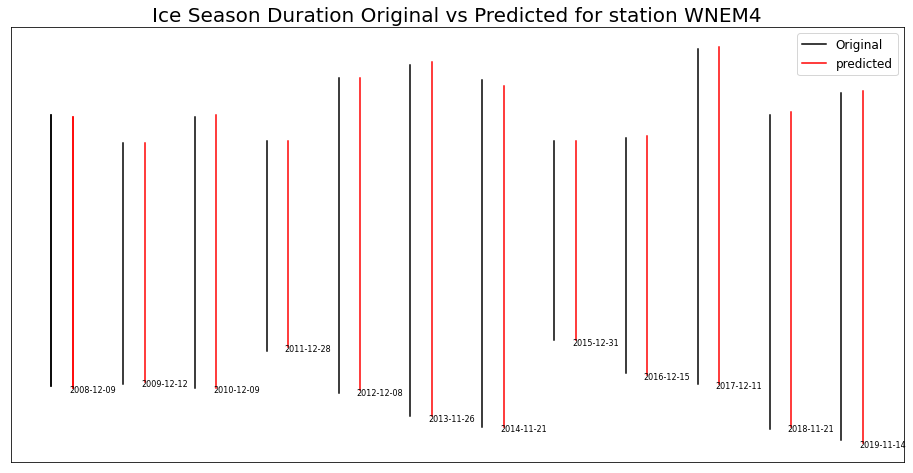

In [55]:
# Draw the Ice-on and Ice-off plots


df_original = df_actual_ice
df = df_predicted_ice

xValue_original = []
yValue_original = []
xValue = []
yValue = []
tick_spacing = 5

for i in range(1,len(df_original['year'])):
    if(int(df_original['Ice_off_date'][i].strftime("%m")) < 11):
        xValue_original.append(df_original['year'][i])
        xValue_original.append(df_original['year'][i])
    else:
        xValue_original.append(df_original['year'][i]+1)
        xValue_original.append(df_original['year'][i]+1)

for i in range(1,len(df['year'])):
    if(int(df['Ice_off_date'][i].strftime("%m")) < 11):
        xValue.append(df['year'][i])
        xValue.append(df['year'][i])
    else:
        xValue.append(df['year'][i]+1)
        xValue.append(df['year'][i]+1)
        
    
for i in range(0,(len(df_original['Ice_off_date'])-1)):
    if(int(df_original['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df_original['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    yValue_original.append((df_original['Ice_on_date'][i]-start_date).days)
    yValue_original.append((df_original['Ice_off_date'][i+1]-start_date).days)

for i in range(0,(len(df['Ice_off_date'])-1)):
    if(int(df['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    else:
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y"))-1,11,1,0,0,0)
    yValue.append((df['Ice_on_date'][i]-start_date).days)
    yValue.append((df['Ice_off_date'][i+1]-start_date).days)


      
plt.figure(figsize=(16,8))  

for i in range(0, int(len(xValue)/2)):

    plt.annotate(df['Ice_on_date'][i].strftime("%Y-%m-%d"),(xValue[2*i],yValue[2*i]), xytext=(xValue[2*i]+0.25,yValue[2*i] -2), fontsize=8)
#     plt.annotate(df['Ice_off_date'][i+1].strftime("%Y-%m-%d"),(xValue[2*i+1],yValue[2*i+1]), xytext=(xValue[2*i+1]-0.8,yValue[2*i+1]), fontsize=8)

    

# for i in range(0, int(len(xValue_original)/2)):
#     ice_on_point = plt.scatter(xValue_original[2*i], yValue_original[2*i], color = 'r', s=6. )
#     ice_off_point = plt.scatter(xValue_original[2*i+1], yValue_original[2*i+1], color = 'b', s=6.)
    
# for i in range(0, int(len(xValue)/2)):
#     ice_on_point = plt.scatter(xValue[2*i] + 0.3, yValue[2*i], color = 'y', s=6. )
#     ice_off_point = plt.scatter(xValue[2*i+1] + 0.3, yValue[2*i+1], color = 'g', s=6.)


# l2 = plt.legend([ice_on_point, ice_off_point], labels = ['Ice On Date', 'Ice Off Date'], bbox_to_anchor=(1.05, 0), loc=1, borderaxespad=0)            


    
for i in range(0, int(len(xValue_original)/2)):
    if(i==0):
        line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k', label = 'Original')
        
    line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k')

plt.legend()
    #     plt.annotate(df['Ice Duration'][i], ((xValue[2*i]+xValue[2*i+1])/2, (yValue[2*i]+yValue[2*i+1])/2), ((xValue[2*i]+xValue[2*i+1])/2+0.1, (yValue[2*i]+yValue[2*i+1])/2))
    
for j in range(0, int(len(xValue)/2)):
    if(j == 0):
        line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], label = 'predicted', color = 'r')
        
    line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], color = 'r')  

plt.legend(loc='upper right', fontsize = 12)
        
    
# plt.legend([line1, line2], labels=['Original', 'Predicted'], bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0)


# plt.gca().add_artist(l2)




plt.title('Ice Season Duration Original vs Predicted for station WNEM4' , fontsize=20)

# plt.axis('off')
plt.yticks([])


frame = plt.gca().axes.get_xaxis().set_visible(False)

plt.savefig('Ice_duration_WNEM4.png')

In [56]:
#df_ml.to_csv('predicted_ice_on_off.csv', index = True)

In [57]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

Text(0.5, 1.0, 'Variable importance for station WNEM4')

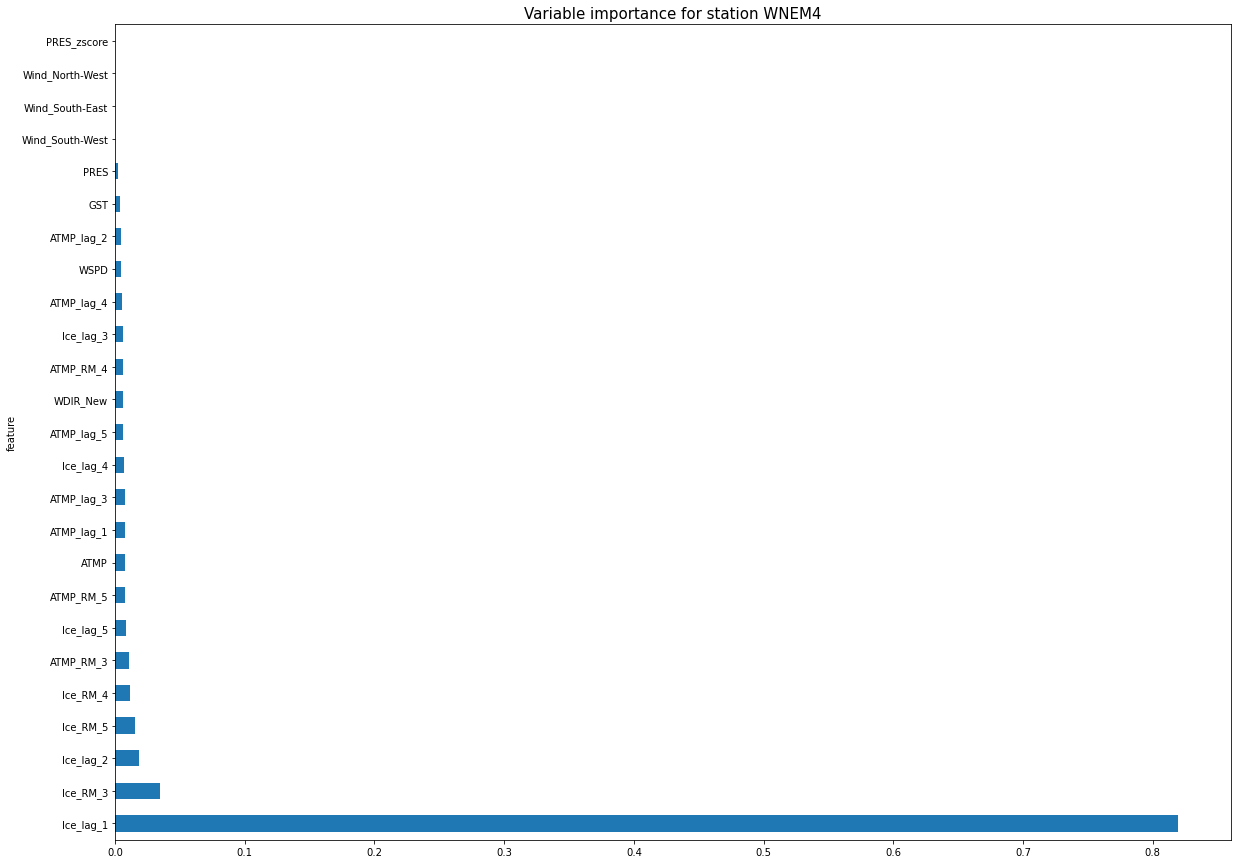

In [58]:
# Displaying the variable importance

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
df_var_imp['importance'].plot(kind = 'barh')
plt.title('Variable importance for station WNEM4' , fontsize=15)

In [59]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.819445
Ice_RM_3           0.034473
Ice_lag_2          0.018527
Ice_RM_5           0.015684
Ice_RM_4           0.011523
ATMP_RM_3          0.010540
Ice_lag_5          0.008122
ATMP_RM_5          0.007634
ATMP               0.007547
ATMP_lag_1         0.007367
ATMP_lag_3         0.007295
Ice_lag_4          0.006947
ATMP_lag_5         0.006473
WDIR_New           0.006180
ATMP_RM_4          0.005911
Ice_lag_3          0.005846
ATMP_lag_4         0.005563
WSPD               0.004484
ATMP_lag_2         0.004262
GST                0.003928
PRES               0.002250
Wind_South-West    0.000000
Wind_South-East    0.000000
Wind_North-West    0.000000
PRES_zscore        0.000000


Text(0.5, 1.0, 'Actual vs. predicted for WNEM4')

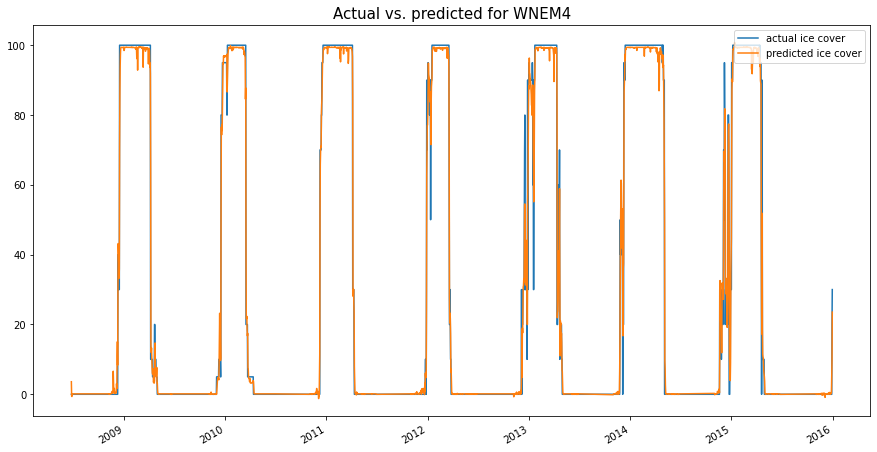

In [60]:
# Overlaying the training predictions on top of training data

plt.figure(figsize=(15,8))
df_train['WNEM'].plot(label = 'actual ice cover')
df_train['WNEM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")
plt.title('Actual vs. predicted for WNEM4' , fontsize=15)

In [61]:
########################## Code for Baseline vs Actual vs Predicted Ice cover #######################

df_plot = pd.concat([df_train, df_test, df_valid], axis = 0)
df_plot = df_plot.drop(['WSPD', 'GST', 'PRES', 'ATMP', 'WNEM_Pred_RM_3'], axis = 1)
df_plot['year'] = df_plot.index.year
df_plot['month'] = df_plot.index.month
df_plot['day'] = df_plot.index.day

df_plot_2020 = df_plot[df_plot['year'] == 2020]
df_plot_rem = df_plot[df_plot['year'] <= 2019]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['WNEM'].mean().reset_index())
res = res.rename(columns = {'WNEM': 'WNEM_Baseline'})
df_plot_2020_final = df_plot_2020.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2020_final.index = df_plot_2020.index

df_plot_2019 = df_plot[df_plot['year'] == 2019]
df_plot_rem = df_plot[df_plot['year'] <= 2018]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['WNEM'].mean().reset_index())
res = res.rename(columns = {'WNEM': 'WNEM_Baseline'})
df_plot_2019_final = df_plot_2019.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2019_final.index = df_plot_2019.index

df_plot_2018 = df_plot[df_plot['year'] == 2018]
df_plot_rem = df_plot[df_plot['year'] <= 2017]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['WNEM'].mean().reset_index())
res = res.rename(columns = {'WNEM': 'WNEM_Baseline'})
df_plot_2018_final = df_plot_2018.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2018_final.index = df_plot_2018.index

df_plot_final = pd.concat([df_plot_2018_final, df_plot_2019_final, df_plot_2020_final], axis = 0)
df_plot_final

,WNEM,WNEM_Pred,year,month,day,WNEM_Baseline
2018-01-01,95.001221,97.441910,2018,1,1,75.554740
2018-01-02,95.001221,96.995743,2018,1,2,77.776588
2018-01-03,95.001221,96.995743,2018,1,3,78.332687
2018-01-04,99.998466,96.894440,2018,1,4,78.330990
2018-01-05,99.998466,98.806152,2018,1,5,86.109582
...,...,...,...,...,...,...
2020-05-19,0.000000,0.119321,2020,5,19,0.000000
2020-05-20,0.000000,0.119321,2020,5,20,0.000000
2020-05-21,0.000000,0.119321,2020,5,21,0.000000
2020-05-22,0.000000,-0.012660,2020,5,22,0.000000


Text(0.5, 1.0, 'Actual vs. Predicted vs. Baseline for station WNEM4')

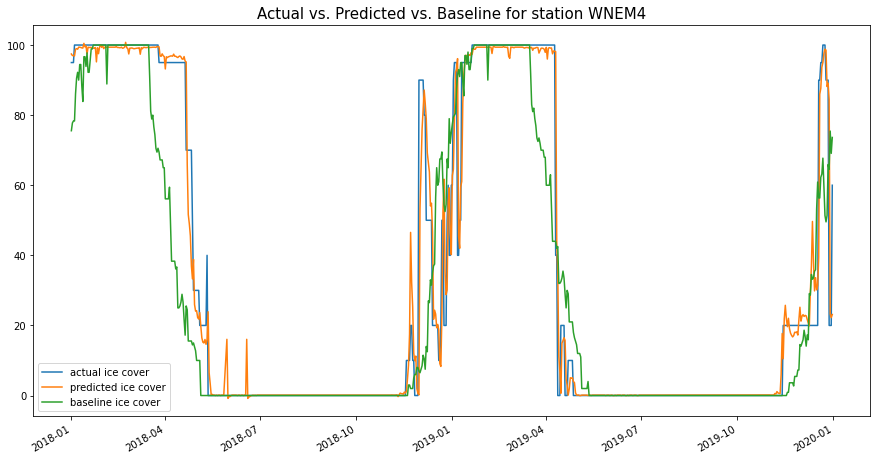

In [62]:
# Overlaying the 2018 and 2019 predictions and baseline on top of actual data

plt.figure(figsize=(15,8))
df_subset_2020 = df_plot_final.loc['2018-01-01':'2020-12-31']
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['WNEM'].plot(label = 'actual ice cover')
df_subset['WNEM_Pred'].plot(label = 'predicted ice cover')
df_subset['WNEM_Baseline'].plot(label = 'baseline ice cover')
plt.legend(loc="lower left")
plt.title('Actual vs. Predicted vs. Baseline for station WNEM4' , fontsize=15)

In [63]:
df_wnem4_2018_2019 = df_subset_2020

Text(0.5, 1.0, 'Actual vs. Predicted 2018 onwards for station WNEM4')

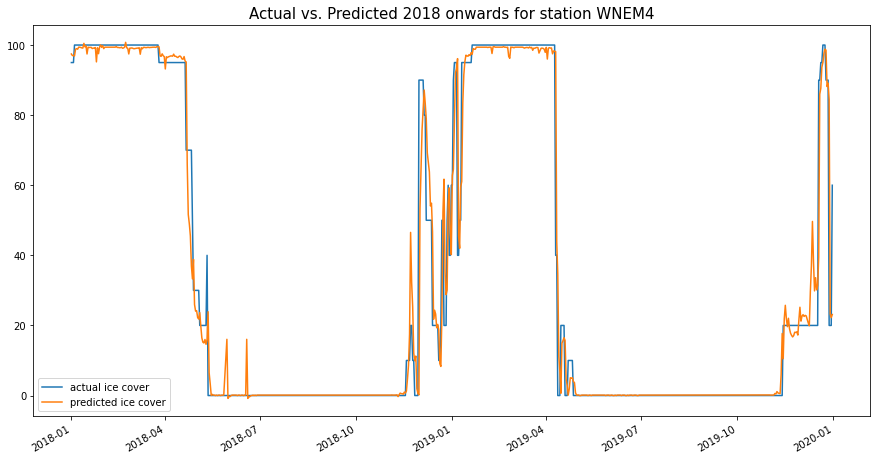

In [64]:
# Overlaying the 2018 and 2019 predictions on top of actual data

plt.figure(figsize=(15,8))
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['WNEM'].plot(label = 'actual ice cover')
df_subset['WNEM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="lower left")
plt.title('Actual vs. Predicted 2018 onwards for station WNEM4' , fontsize=15)

Text(0.5, 1.0, 'Actual vs. predicted - Jan 2019 - WNEM4')

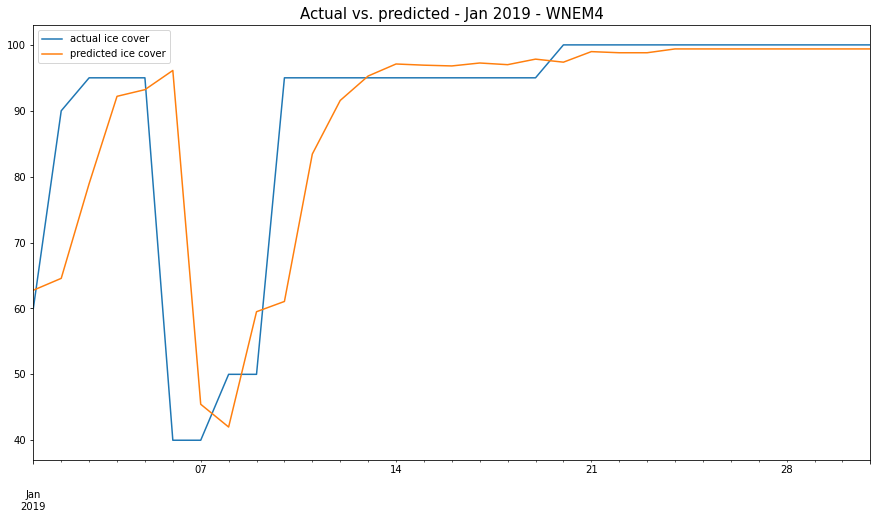

In [65]:
# Overlaying January 2019 predictions on top of actual data for January 2019

plt.figure(figsize=(15,8))
df_subset = df_test.loc['2019-01-01':'2019-01-31']
df_subset['WNEM'].plot(label = 'actual ice cover')
df_subset['WNEM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper left")
plt.title('Actual vs. predicted - Jan 2019 - WNEM4' , fontsize=15)

In [66]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-02-01 as the split date

split_date = '2019-02-01'

df_merge_1 = df_merge[['WNEM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5',  
                      'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_merge_train = df_merge_1.loc[df_merge.index < split_date].copy()
df_merge_test = df_merge_1.loc[df_merge.index == split_date].copy()

X_train = df_merge_train.drop(['WNEM'], axis = 1)
X_test = df_merge_test.drop(['WNEM'], axis = 1)
y_train = df_merge_train['WNEM']
y_test = df_merge_test['WNEM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(2516, 13) (2516,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.1s finished


0.9506971799369215
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [67]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.19595], dtype=float32)

In [68]:
### Actual ice cover on the day of the test data

y_test

2019-02-01    99.998466
Name: WNEM, dtype: float64

In [69]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.8025131225585938


In [70]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [71]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['WNEM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-03 2019-02-03    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-04 2019-02-04    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-05 2019-02-05    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-06 2019-02-06    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-07 2019-02-07    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-08 2019-02-08    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-09 2019-02-09    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-10 2019-02-10    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-11 2019-02-11    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-12 2019-02-12    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-13 2019-02-13    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-14 2019-02-14    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-15 2019-02-15    99.998466
Name: WNEM, dtyp

In [72]:
print(mean_absolute_error(y_test, y_test_pred))

0.8025131225585938


In [73]:
######### Using the predicted value on any date as ground truth and forecasting for next 7 days #################

for i in range(1, 8):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['WNEM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-03 2019-02-03    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-04 2019-02-04    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-05 2019-02-05    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-06 2019-02-06    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-07 2019-02-07    99.998466
Name: WNEM, dtype: float64 [99.19595]
2019-02-08 2019-02-08    99.998466
Name: WNEM, dtype: float64 [99.19595]


In [74]:
df_merge['year'] = pd.DatetimeIndex(df_merge.index).year
df_merge['month'] = pd.DatetimeIndex(df_merge.index).month
df_merge['day'] = pd.DatetimeIndex(df_merge.index).day
df_merge.head()

,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2008-06-25,3.494737,5.744737,1012.373684,26.660526,0.0,50.473684,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.364562,2008,6,25
2008-06-26,3.449583,4.780833,1010.150000,18.718750,0.0,70.904167,0,0,1,26.660526,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.643958,2008,6,26
2008-06-27,2.760669,3.674059,1010.521757,17.252720,0.0,78.066946,0,0,1,18.718750,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.597248,2008,6,27
2008-06-28,3.046250,4.592500,1003.706667,18.003333,0.0,81.712500,0,1,0,17.252720,...,20.877332,NaN,NaN,0.0,NaN,NaN,-1.453534,2008,6,28
2008-06-29,2.721250,3.937083,1003.561667,16.155833,0.0,45.400000,0,0,1,18.003333,...,17.991601,20.158832,NaN,0.0,0.0,NaN,-1.471752,2008,6,29


In [75]:
########## Freezing Phase: Nov 25 - Jan 30
########## Stable Phase: Jan 31 - Mar 25
########## Melting Phase: Mar 26 - May 30
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_freezing = df_merge[df_merge['month'].isin([11, 12, 1])]
df_freezing = df_freezing[~((df_freezing['month'] == 11) & (df_freezing['day'] < 1))]
df_freezing = df_freezing[~((df_freezing['month'] == 1) & (df_freezing['day'] > 14))]

In [76]:
df_stable = df_merge[df_merge['month'].isin([1, 2, 3])]
df_stable = df_stable[~((df_stable['month'] == 1) & (df_stable['day'] < 15))]
df_stable = df_stable[~((df_stable['month'] == 3) & (df_stable['day'] > 25))]

In [77]:
df_melting = df_merge[df_merge['month'].isin([3, 4, 5])]
df_melting = df_melting[~((df_melting['month'] == 3) & (df_melting['day'] < 26))]
df_melting = df_melting[~((df_melting['month'] == 5) & (df_melting['day'] > 10))]

In [78]:
df_freezing.head()

,WSPD,GST,PRES,ATMP,WNEM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,ATMP_lag_2,ATMP_lag_3,ATMP_lag_4,ATMP_lag_5,Ice_lag_1,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2008-11-01,2.248117,3.280753,1031.656904,2.941004,0.0,71.025105,0,1,0,15.045833,16.155833,18.003333,17.252720,18.718750,0.0,0.0,0.0,0.0,0.0,16.401667,16.614430,17.035294,0.0,0.0,0.0,2.058288,2008,11,1
2008-11-02,3.080417,4.599160,1029.647917,1.684583,0.0,78.222689,0,1,0,2.941004,15.045833,16.155833,18.003333,17.252720,0.0,0.0,0.0,0.0,0.0,11.380890,13.036501,13.879745,0.0,0.0,0.0,1.805868,2008,11,2
2008-11-03,2.319583,3.510042,1021.363333,8.007917,0.0,30.276151,0,1,0,1.684583,2.941004,15.045833,16.155833,18.003333,0.0,0.0,0.0,0.0,0.0,6.557140,8.956814,10.766118,0.0,0.0,0.0,0.764947,2008,11,3
2008-11-04,2.683333,4.022083,1018.568333,11.706250,0.0,59.645833,0,1,0,8.007917,1.684583,2.941004,15.045833,16.155833,0.0,0.0,0.0,0.0,0.0,4.211168,6.919834,8.767034,0.0,0.0,0.0,0.413768,2008,11,4
2008-11-05,2.652083,3.635021,1015.559167,11.991667,0.0,57.725000,0,1,0,11.706250,8.007917,1.684583,2.941004,15.045833,0.0,0.0,0.0,0.0,0.0,7.132917,6.084939,7.877118,0.0,0.0,0.0,0.035680,2008,11,5


#### Training XGBoost Model on freezing period - wnem4

In [79]:
# Separating the Independent and dependent variables

X = df_freezing.drop(['WNEM'], axis = 1)
y = df_freezing['WNEM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [80]:
########## Freezing Phase: Dec 01 – Jan 14
########## Stable Phase: Jan 15 – Apr 05
########## Melting Phase: Apr 06 – May 30
X_train = X['2007-11-01':'2015-01-14']
X_test = X['2016-11-01':'2020-01-14']
y_train = y['2007-11-01':'2015-01-14']
y_test = y['2016-11-01':'2020-01-14']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(525, 25) (525,)
(295, 25) (295,)


In [81]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s


0.8798754653558529
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 13.68 seconds


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.4s finished


In [82]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

2.6628538888373545


In [83]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

7.220111983585156


In [84]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [85]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [86]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [87]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.544039
Ice_RM_3           0.130855
Ice_RM_4           0.104368
Ice_RM_5           0.028412
Ice_lag_5          0.026987
Ice_lag_3          0.015712
Ice_lag_4          0.014571
ATMP               0.013992
ATMP_lag_2         0.013409
WSPD               0.013306
ATMP_lag_1         0.012300
ATMP_lag_3         0.011449
Ice_lag_2          0.011083
ATMP_RM_3          0.010361
ATMP_lag_4         0.010037
GST                0.008817
ATMP_RM_4          0.007985
PRES               0.006319
ATMP_RM_5          0.006099
ATMP_lag_5         0.005583
WDIR_New           0.004281
Wind_South-West    0.000036
Wind_South-East    0.000000
Wind_North-West    0.000000
PRES_zscore        0.000000


Text(0.5, 1.0, 'Actual vs. predicted on training data- WNEM4')

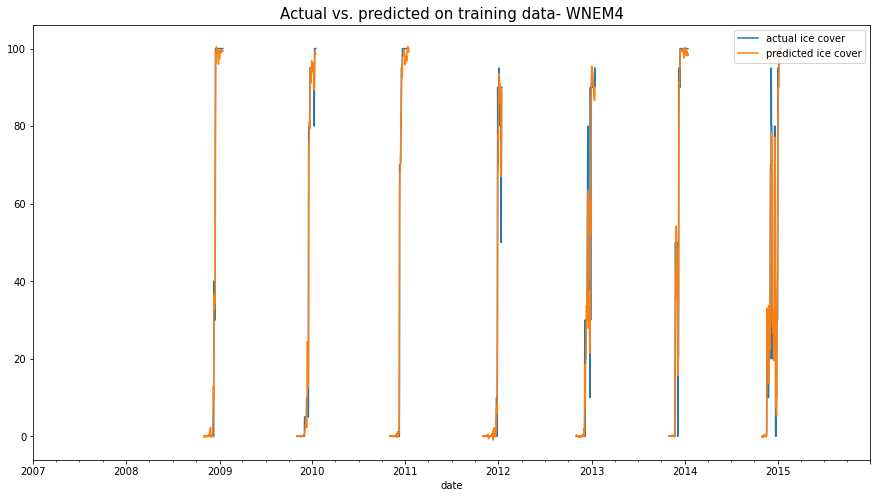

In [88]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'WNEM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['WNEM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['WNEM'].plot(label = 'actual ice cover')
y_train_pred['WNEM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")
plt.title('Actual vs. predicted on training data- WNEM4' , fontsize=15)

In [89]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-01-01 as the 
### test data set.

split_date = '2019-01-01'

df_freeze_1 = df_freezing[['WNEM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_freeze_train = df_freeze_1.loc[df_freezing.index < split_date].copy()
df_freeze_test = df_freeze_1.loc[df_freezing.index == split_date].copy()

X_train = df_freeze_train.drop(['WNEM'], axis = 1)
X_test = df_freeze_test.drop(['WNEM'], axis = 1)
y_train = df_freeze_train['WNEM']
y_test = df_freeze_test['WNEM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(811, 13) (811,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


0.8820592097484152
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.1s finished


In [90]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([58.059383], dtype=float32)

In [91]:
### Actual ice cover on the day of the test data

y_test

2019-01-01    59.997559
Name: WNEM, dtype: float64

In [92]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

1.9381752014160156


In [93]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [94]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_freeze_test = df_freeze_1.loc[df_freeze_1.index == res].copy()
    
    y_test = df_freeze_test['WNEM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-01-02 2019-01-02    89.996338
Name: WNEM, dtype: float64 [58.059383]
2019-01-03 2019-01-03    95.001221
Name: WNEM, dtype: float64 [58.3856]
2019-01-04 2019-01-04    95.001221
Name: WNEM, dtype: float64 [58.3856]
2019-01-05 2019-01-05    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-06 2019-01-06    40.000919
Name: WNEM, dtype: float64 [57.91379]
2019-01-07 2019-01-07    40.000919
Name: WNEM, dtype: float64 [57.91379]
2019-01-08 2019-01-08    50.003052
Name: WNEM, dtype: float64 [57.91379]
2019-01-09 2019-01-09    50.003052
Name: WNEM, dtype: float64 [57.91379]
2019-01-10 2019-01-10    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-11 2019-01-11    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-12 2019-01-12    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-13 2019-01-13    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-14 2019-01-14    95.001221
Name: WNEM, dtype: float64 [57.91379]
2019-01-15 Series([], Name: WNEM, dtype: float64) [5

#### Training XGBoost Model on stable period - wnem4

In [95]:
# Separating the Independent and dependent variables

X = df_stable.drop(['WNEM'], axis = 1)
y = df_stable['WNEM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [96]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-01-15':'2015-03-25']
X_test = X['2016-01-15':'2020-03-25']
y_train = y['2007-01-15':'2015-03-25']
y_test = y['2016-01-15':'2020-03-25']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 25) (491,)
(350, 25) (350,)


In [97]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   21.6s finished


0.2470320141889229
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 21.91 seconds


In [98]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

0.09930588902863854


In [99]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

1.8110641397748675


In [100]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [101]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [102]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [103]:
print(df_var_imp)

                 importance
feature                    
Ice_RM_3           0.356978
Ice_lag_1          0.255703
Ice_RM_4           0.107982
ATMP_lag_1         0.054020
ATMP_RM_3          0.035731
ATMP_lag_3         0.034442
Ice_lag_2          0.027942
ATMP_lag_4         0.024110
PRES_zscore        0.021252
ATMP_lag_5         0.019064
ATMP               0.010208
ATMP_RM_5          0.009941
PRES               0.005982
GST                0.005552
Ice_RM_5           0.004916
ATMP_lag_2         0.003687
WDIR_New           0.003606
Ice_lag_3          0.003328
Ice_lag_5          0.003239
Wind_North-West    0.002986
ATMP_RM_4          0.002267
Ice_lag_4          0.002129
Wind_South-West    0.001725
Wind_South-East    0.001667
WSPD               0.001542


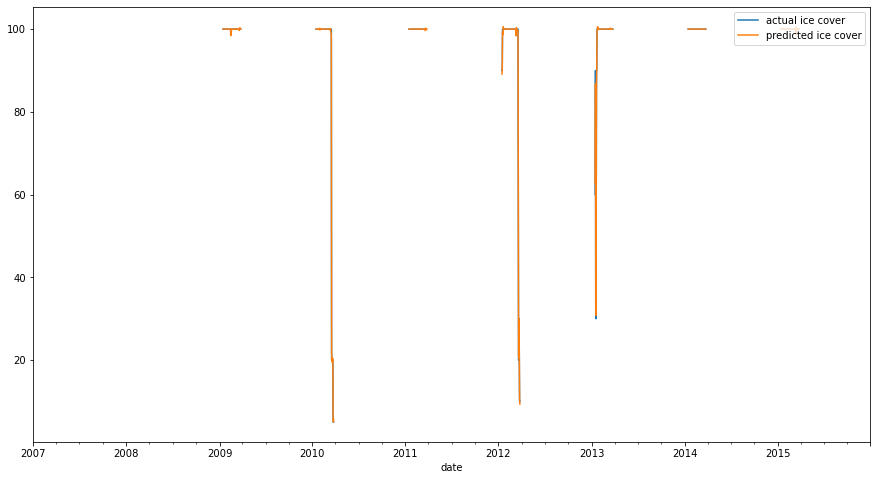

In [104]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'WNEM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['WNEM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['WNEM'].plot(label = 'actual ice cover')
y_train_pred['WNEM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")


In [105]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-03-01 as the 
### test data set.

split_date = '2019-03-01'

df_stable_1 = df_stable[['WNEM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                         'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                         'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_stable_train = df_stable_1.loc[df_stable_1.index < split_date].copy()
df_stable_test = df_stable_1.loc[df_stable_1.index == split_date].copy()

X_train = df_stable_train.drop(['WNEM'], axis = 1)
X_test = df_stable_test.drop(['WNEM'], axis = 1)
y_train = df_stable_train['WNEM']
y_test = df_stable_test['WNEM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(745, 13) (745,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s


0.2512126651534692
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   16.5s finished


In [106]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.27308], dtype=float32)

In [107]:
### Actual ice cover on the day of the testation data

y_test

2019-03-01    99.998466
Name: WNEM, dtype: float64

In [108]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.7253875732421875


In [109]:
X_test

,Ice_lag_1,Ice_RM_3,Ice_RM_4,Ice_RM_5,ATMP_RM_4,ATMP_RM_3,ATMP_RM_5,Ice_lag_2,ATMP_lag_4,ATMP,Ice_lag_3,Ice_lag_4,Ice_lag_5
2019-03-01,99.998466,99.998466,99.998466,99.998466,-12.554873,-13.944523,-10.035046,99.998466,-8.385922,-10.122907,99.998466,99.998466,99.998466


In [110]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_stable_test = df_stable_1.loc[df_stable_1.index == res].copy()
    
    y_test = df_stable_test['WNEM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-03-02 2019-03-02    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-03 2019-03-03    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-04 2019-03-04    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-05 2019-03-05    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-06 2019-03-06    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-07 2019-03-07    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-08 2019-03-08    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-09 2019-03-09    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-10 2019-03-10    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-11 2019-03-11    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-12 2019-03-12    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-13 2019-03-13    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-14 2019-03-14    99.998466
Name: WNEM, dtype: float64 [99.27308]
2019-03-15 2019-03-15    99.998466
Name: WNEM, dtyp

In [111]:
y_test

2019-03-15    99.998466
Name: WNEM, dtype: float64

#### Training XGBoost Model on melting period - wnem4

In [112]:
# Separating the Independent and dependent variables

X = df_melting.drop(['WNEM'], axis = 1)
y = df_melting['WNEM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [113]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-03-26':'2015-05-10']
X_test = X['2016-03-26':'2020-05-10']
y_train = y['2007-03-26':'2015-05-10']
y_test = y['2016-03-26':'2020-05-10']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(322, 25) (322,)
(230, 25) (230,)


In [114]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   23.4s finished


0.6320179230684116
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 23.68 seconds


In [115]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

0.6151966784613624


In [116]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

6.813908744773463


In [117]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [118]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [119]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [120]:
print(df_var_imp)

                 importance
feature                    
Ice_RM_4           0.577150
Ice_RM_5           0.277618
Ice_RM_3           0.054641
Ice_lag_1          0.048944
Ice_lag_4          0.008158
Ice_lag_2          0.005551
ATMP_RM_5          0.002854
ATMP_lag_4         0.002639
WSPD               0.002626
Ice_lag_3          0.002396
ATMP               0.002231
WDIR_New           0.002124
ATMP_lag_5         0.001956
PRES_zscore        0.001780
ATMP_lag_1         0.001539
ATMP_lag_2         0.001409
ATMP_RM_4          0.001372
ATMP_lag_3         0.001358
GST                0.001260
PRES               0.000862
Ice_lag_5          0.000751
ATMP_RM_3          0.000260
Wind_North-West    0.000190
Wind_South-West    0.000168
Wind_South-East    0.000161


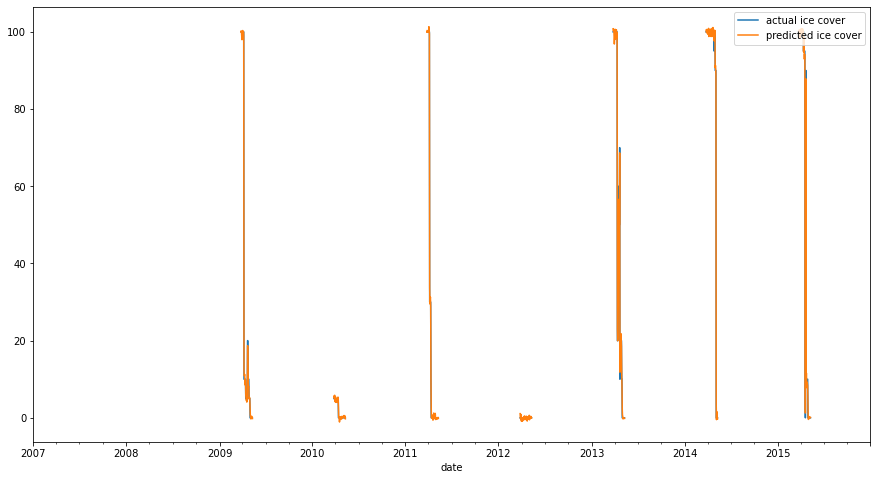

In [121]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'WNEM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['WNEM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['WNEM'].plot(label = 'actual ice cover')
y_train_pred['WNEM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [122]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-04-20 as the test data set.

split_date = '2019-04-20'

df_melting_1 = df_melting[['WNEM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_melting_train = df_melting_1.loc[df_melting_1.index < split_date].copy()
df_melting_test = df_melting_1.loc[df_melting_1.index == split_date].copy()

X_train = df_melting_train.drop(['WNEM'], axis = 1)
X_test = df_melting_test.drop(['WNEM'], axis = 1)
y_train = df_melting_train['WNEM']
y_test = df_melting_test['WNEM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(485, 13) (485,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s


0.849106576488223
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   16.5s finished


In [123]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([1.9859027], dtype=float32)

In [124]:
### Actual ice cover on the day of the testation data

y_test

2019-04-20    0.0
Name: WNEM, dtype: float64

In [125]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

1.9859026670455933


In [126]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [127]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_melting_test = df_melting_1.loc[df_melting_1.index == res].copy()
    
    y_test = df_melting_test['WNEM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-04-21 2019-04-21    0.0
Name: WNEM, dtype: float64 [1.0788854]
2019-04-22 2019-04-22    10.00214
Name: WNEM, dtype: float64 [0.7576976]
2019-04-23 2019-04-23    10.00214
Name: WNEM, dtype: float64 [0.8527614]
2019-04-24 2019-04-24    10.00214
Name: WNEM, dtype: float64 [-0.19375892]
2019-04-25 2019-04-25    10.00214
Name: WNEM, dtype: float64 [-0.19375892]
2019-04-26 2019-04-26    10.00214
Name: WNEM, dtype: float64 [-0.19375892]
2019-04-27 2019-04-27    0.0
Name: WNEM, dtype: float64 [0.4297052]
2019-04-28 2019-04-28    0.0
Name: WNEM, dtype: float64 [-0.19375892]
2019-04-29 2019-04-29    0.0
Name: WNEM, dtype: float64 [-0.7165729]
2019-04-30 2019-04-30    0.0
Name: WNEM, dtype: float64 [-0.09310891]
2019-05-01 2019-05-01    0.0
Name: WNEM, dtype: float64 [-0.09310891]
2019-05-02 2019-05-02    0.0
Name: WNEM, dtype: float64 [-0.09310891]
2019-05-03 2019-05-03    0.0
Name: WNEM, dtype: float64 [-0.09310891]
2019-05-04 2019-05-04    0.0
Name: WNEM, dtype: float64 [-0.09310891]


In [128]:
df_wnem4_2018_2019.head()

,WNEM,WNEM_Pred,year,month,day,WNEM_Baseline
2018-01-01,95.001221,97.441910,2018,1,1,75.554740
2018-01-02,95.001221,96.995743,2018,1,2,77.776588
2018-01-03,95.001221,96.995743,2018,1,3,78.332687
2018-01-04,99.998466,96.894440,2018,1,4,78.330990
2018-01-05,99.998466,98.806152,2018,1,5,86.109582


In [129]:
df_wnem4_2018_2019.tail()

,WNEM,WNEM_Pred,year,month,day,WNEM_Baseline
2020-05-19,0.0,0.119321,2020,5,19,0.0
2020-05-20,0.0,0.119321,2020,5,20,0.0
2020-05-21,0.0,0.119321,2020,5,21,0.0
2020-05-22,0.0,-0.012660,2020,5,22,0.0
2020-05-23,0.0,0.119321,2020,5,23,0.0


In [130]:
df_wnem4_2018_2019 = df_wnem4_2018_2019.drop(['year', 'month', 'day'], axis = 1)

In [131]:
df_wnem4_2018_2019.head()

,WNEM,WNEM_Pred,WNEM_Baseline
2018-01-01,95.001221,97.441910,75.554740
2018-01-02,95.001221,96.995743,77.776588
2018-01-03,95.001221,96.995743,78.332687
2018-01-04,99.998466,96.894440,78.330990
2018-01-05,99.998466,98.806152,86.109582


In [132]:
df_wnem4_2018_2019.tail()

,WNEM,WNEM_Pred,WNEM_Baseline
2020-05-19,0.0,0.119321,0.0
2020-05-20,0.0,0.119321,0.0
2020-05-21,0.0,0.119321,0.0
2020-05-22,0.0,-0.012660,0.0
2020-05-23,0.0,0.119321,0.0


In [133]:
df_wnem4_2018_2019.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/WNEM4_2018_2019.csv', index = True, header=True)

In [134]:
df_icedur_pred_wnem4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2008,2008-06-27,2008-12-09,125 days
1,2009,2009-04-13,2009-12-12,110 days
2,2010,2010-04-01,2010-12-09,126 days
3,2011,2011-04-14,2011-12-28,95 days
4,2012,2012-04-01,2012-12-08,144 days


In [135]:
df_icedur_pred_wnem4 = df_icedur_pred_wnem4.drop(['duration'],axis=1)

In [136]:
df_icedur_pred_wnem4.head()

,year,Ice_off_date,Ice_on_date
0,2008,2008-06-27,2008-12-09
1,2009,2009-04-13,2009-12-12
2,2010,2010-04-01,2010-12-09
3,2011,2011-04-14,2011-12-28
4,2012,2012-04-01,2012-12-08


In [137]:
df_icedur_pred_wnem4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/WNEM4_icedur_pred.csv', index = False, header=True)

In [138]:
df_icedur_act_wnem4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2008,2008-06-27,2008-12-10,125 days
1,2009,2009-04-14,2009-12-11,111 days
2,2010,2010-04-01,2010-12-09,125 days
3,2011,2011-04-13,2011-12-26,97 days
4,2012,2012-04-01,2012-12-07,145 days


In [139]:
df_icedur_act_wnem4 = df_icedur_act_wnem4.drop(['duration'],axis=1)

In [140]:
df_icedur_act_wnem4.head()

,year,Ice_off_date,Ice_on_date
0,2008,2008-06-27,2008-12-10
1,2009,2009-04-14,2009-12-11
2,2010,2010-04-01,2010-12-09
3,2011,2011-04-13,2011-12-26
4,2012,2012-04-01,2012-12-07


In [141]:
df_icedur_act_wnem4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/WNEM4_icedur_act.csv', index = False, header=True)